In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

#### **Task 6**: How many states cover 50% of US air traffic? 

In [2]:
flights = pd.read_csv('../Data/files/flights_no_missing.csv')
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [14]:
flights[['origin_airport_id', 'origin_city_name']]

,origin_airport_id,origin_city_name
0,12266,"Houston, TX"
1,13244,"Memphis, TN"
2,12266,"Houston, TX"
3,11042,"Cleveland, OH"
4,13061,"Laredo, TX"
...,...,...
2339957,11298,"Dallas/Fort Worth, TX"
2339958,13577,"Myrtle Beach, SC"
2339959,10792,"Buffalo, NY"
2339960,12266,"Houston, TX"


In [15]:
#city_state = flights["origin_city_name"].apply(lambda x: x.split(", "))
#city = city_state.apply(lambda x: (x[0]))
#state = city_state.apply(lambda x: x[1])
#result = pd.DataFrame(zip(city, state), columns=["city", "state"])

In [19]:
city_state = flights["origin_city_name"].apply(lambda x: x.split(", "))
state = city_state.apply(lambda x: x[1])

In [20]:
flights2 = flights.copy()

In [173]:
flights2[['origin_city_name', 'origin', 'origin_airport_id', 'dest_city_name', 'dest', 'dest_airport_id']]

MemoryError: Unable to allocate 35.7 MiB for an array with shape (2, 2339962) and data type int64

In [29]:
flights2['dep_state'] = flights2["origin_city_name"].apply(lambda x: x.split(", ")[1])
flights2['arr_state'] = flights2["dest_city_name"].apply(lambda x: x.split(", ")[1])

In [30]:
states_traffic = flights2[['fl_date', 'origin_city_name', 'dep_state', 'origin', 'origin_airport_id', 'dest_city_name', 'arr_state', 'dest', 'dest_airport_id']]

In [31]:
states_traffic.head()

,fl_date,origin_city_name,dep_state,origin,origin_airport_id,dest_city_name,arr_state,dest,dest_airport_id
0,2019-05-19,"Houston, TX",TX,IAH,12266,"Lake Charles, LA",LA,LCH,12915
1,2019-05-19,"Memphis, TN",TN,MEM,13244,"Houston, TX",TX,IAH,12266
2,2019-05-19,"Houston, TX",TX,IAH,12266,"Cleveland, OH",OH,CLE,11042
3,2019-05-19,"Cleveland, OH",OH,CLE,11042,"Washington, DC",DC,DCA,11278
4,2019-05-19,"Laredo, TX",TX,LRD,13061,"Houston, TX",TX,IAH,12266


In [34]:
dep_states_traffic = flights2['dep_state'].value_counts()
arr_states_traffic = flights2['arr_state'].value_counts()

In [35]:
dep_states_traffic

CA    257018
TX    230132
FL    170341
IL    146331
GA    125186
NY    119871
NC    107958
CO     91658
PA     69668
DC     69091
WA     67883
MI     66087
AZ     61273
NV     56277
OH     53043
MN     50891
NJ     48041
MA     44812
MO     42998
TN     41334
UT     37673
HI     35201
OR     33702
MD     31648
LA     25101
VA     22621
IN     21266
WI     21130
SC     20401
OK     13345
AL     12889
KY     12195
AK     12167
ID      9909
NE      9849
AR      9457
NM      9435
IA      9140
CT      9090
MT      8946
PR      8579
ND      6279
ME      6032
RI      5840
KS      4860
SD      4581
MS      4567
NH      3533
VT      3336
WY      3033
WV      2456
VI      1234
TT       574
Name: dep_state, dtype: int64

In [36]:
dep_states_traffic.index

Index(['CA', 'TX', 'FL', 'IL', 'GA', 'NY', 'NC', 'CO', 'PA', 'DC', 'WA', 'MI',
       'AZ', 'NV', 'OH', 'MN', 'NJ', 'MA', 'MO', 'TN', 'UT', 'HI', 'OR', 'MD',
       'LA', 'VA', 'IN', 'WI', 'SC', 'OK', 'AL', 'KY', 'AK', 'ID', 'NE', 'AR',
       'NM', 'IA', 'CT', 'MT', 'PR', 'ND', 'ME', 'RI', 'KS', 'SD', 'MS', 'NH',
       'VT', 'WY', 'WV', 'VI', 'TT'],
      dtype='object')

In [37]:
dep_states_traffic.cumsum()

CA     257018
TX     487150
FL     657491
IL     803822
GA     929008
NY    1048879
NC    1156837
CO    1248495
PA    1318163
DC    1387254
WA    1455137
MI    1521224
AZ    1582497
NV    1638774
OH    1691817
MN    1742708
NJ    1790749
MA    1835561
MO    1878559
TN    1919893
UT    1957566
HI    1992767
OR    2026469
MD    2058117
LA    2083218
VA    2105839
IN    2127105
WI    2148235
SC    2168636
OK    2181981
AL    2194870
KY    2207065
AK    2219232
ID    2229141
NE    2238990
AR    2248447
NM    2257882
IA    2267022
CT    2276112
MT    2285058
PR    2293637
ND    2299916
ME    2305948
RI    2311788
KS    2316648
SD    2321229
MS    2325796
NH    2329329
VT    2332665
WY    2335698
WV    2338154
VI    2339388
TT    2339962
Name: dep_state, dtype: int64

We filter out the states that make up 50%

In [38]:
dep_states_traffic_percent = ((dep_states_traffic.cumsum() / dep_states_traffic.sum()) * 100)
dep_states_traffic_percent

CA     10.983854
TX     20.818714
FL     28.098362
IL     34.351925
GA     39.701841
NY     44.824617
NC     49.438281
CO     53.355354
PA     56.332667
DC     59.285322
WA     62.186352
MI     65.010628
AZ     67.629175
NV     70.034214
OH     72.301046
MN     74.475910
NJ     76.528978
MA     78.444052
MO     80.281603
TN     82.048042
UT     83.658025
HI     85.162366
OR     86.602646
MD     87.955146
LA     89.027856
VA     89.994581
IN     90.903399
WI     91.806405
SC     92.678257
OK     93.248566
AL     93.799386
KY     94.320549
AK     94.840515
ID     95.263983
NE     95.684887
AR     96.089039
NM     96.492251
IA     96.882855
CT     97.271323
MT     97.653637
PR     98.020267
ND     98.288605
ME     98.546387
RI     98.795963
KS     99.003659
SD     99.199431
MS     99.394606
NH     99.545591
VT     99.688157
WY     99.817775
WV     99.922734
VI     99.975470
TT    100.000000
Name: dep_state, dtype: float64

These are the states which cover 50% of US air traffic:

In [39]:
dep_states_traffic_percent[dep_states_traffic_percent <= 50].index

Index(['CA', 'TX', 'FL', 'IL', 'GA', 'NY', 'NC'], dtype='object')

We do the same for the arr_states data.

In [40]:
arr_states_traffic

CA    257081
TX    230677
FL    170216
IL    146086
GA    124632
NY    119829
NC    107780
CO     91444
DC     69250
PA     69115
WA     68448
MI     65786
AZ     61358
NV     56133
OH     53524
MN     51173
NJ     48129
MA     45461
MO     43290
TN     40919
UT     37416
HI     35099
OR     33739
MD     31641
LA     25112
VA     22463
IN     21496
WI     20600
SC     20393
OK     13447
AL     12838
AK     12087
KY     11983
NE      9871
ID      9810
AR      9769
NM      9402
CT      9074
IA      9017
MT      8997
PR      8606
ND      6318
ME      6100
RI      5936
KS      4971
MS      4621
SD      4601
VT      3479
NH      3387
WY      3035
WV      2500
VI      1235
TT       588
Name: arr_state, dtype: int64

In [41]:
arr_states_traffic.cumsum()

CA     257081
TX     487758
FL     657974
IL     804060
GA     928692
NY    1048521
NC    1156301
CO    1247745
DC    1316995
PA    1386110
WA    1454558
MI    1520344
AZ    1581702
NV    1637835
OH    1691359
MN    1742532
NJ    1790661
MA    1836122
MO    1879412
TN    1920331
UT    1957747
HI    1992846
OR    2026585
MD    2058226
LA    2083338
VA    2105801
IN    2127297
WI    2147897
SC    2168290
OK    2181737
AL    2194575
AK    2206662
KY    2218645
NE    2228516
ID    2238326
AR    2248095
NM    2257497
CT    2266571
IA    2275588
MT    2284585
PR    2293191
ND    2299509
ME    2305609
RI    2311545
KS    2316516
MS    2321137
SD    2325738
VT    2329217
NH    2332604
WY    2335639
WV    2338139
VI    2339374
TT    2339962
Name: arr_state, dtype: int64

In [42]:
arr_states_traffic_percent = (arr_states_traffic.cumsum() / arr_states_traffic.sum()) * 100
arr_states_traffic_percent

CA     10.986546
TX     20.844697
FL     28.119004
IL     34.362096
GA     39.688337
NY     44.809317
NC     49.415375
CO     53.323302
DC     56.282752
PA     59.236432
WA     62.161608
MI     64.973021
AZ     67.595200
NV     69.994085
OH     72.281473
MN     74.468389
NJ     76.525217
MA     78.468026
MO     80.318056
TN     82.066760
UT     83.665760
HI     85.165742
OR     86.607603
MD     87.959804
LA     89.032984
VA     89.992957
IN     90.911605
WI     91.791961
SC     92.663471
OK     93.238138
AL     93.786779
AK     94.303326
KY     94.815429
NE     95.237273
ID     95.656511
AR     96.073996
NM     96.475797
CT     96.863582
IA     97.248930
MT     97.633423
PR     98.001207
ND     98.271211
ME     98.531899
RI     98.785579
KS     98.998018
MS     99.195500
SD     99.392127
VT     99.540805
NH     99.685550
WY     99.815253
WV     99.922093
VI     99.974871
TT    100.000000
Name: arr_state, dtype: float64

In [43]:
arr_states_traffic_percent[arr_states_traffic_percent <= 50].index

Index(['CA', 'TX', 'FL', 'IL', 'GA', 'NY', 'NC'], dtype='object')

<AxesSubplot:label='7c3690c3-b9fc-453f-91cb-bd2b95e42ffa', ylabel='dep_state'>

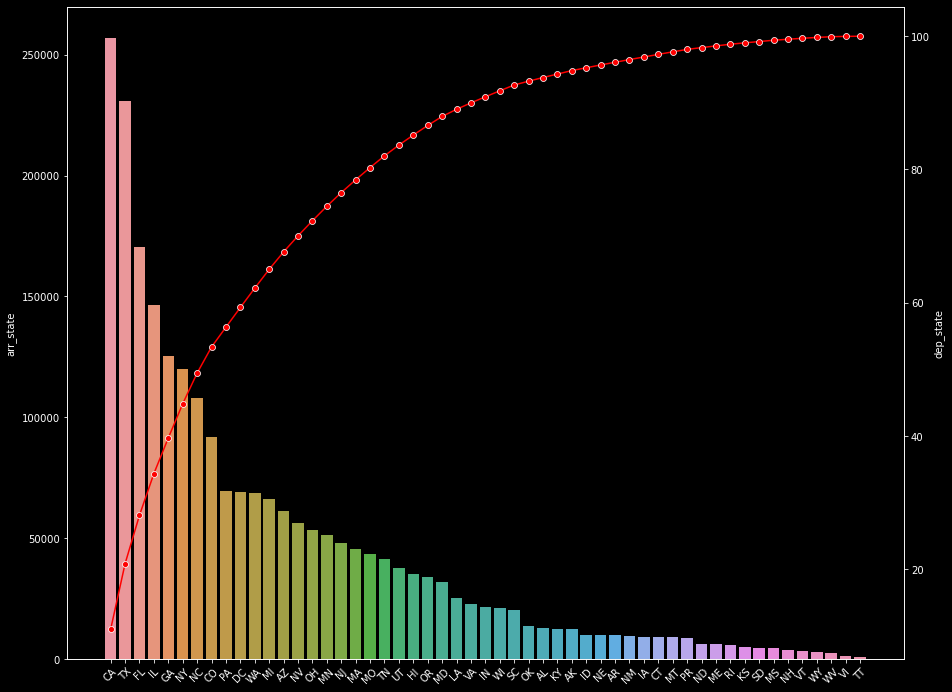

In [170]:
fig, ax1 = plt.subplots(figsize=(15,12))


sns.barplot(x=dep_states_traffic.index, y=dep_states_traffic, ax=ax1)
sns.barplot(x=arr_states_traffic.index, y=arr_states_traffic, ax=ax1)
ax1.set_xticklabels(labels=dep_states_traffic.index, rotation=45)
ax2 = ax1.twinx()

sns.lineplot(data = ((dep_states_traffic.cumsum() / dep_states_traffic.sum()) * 100), color='red', marker='o', sort = False, ax=ax2)



<AxesSubplot:label='a8711860-70f7-43db-905b-bf0fe6ffd823', ylabel='arr_state'>

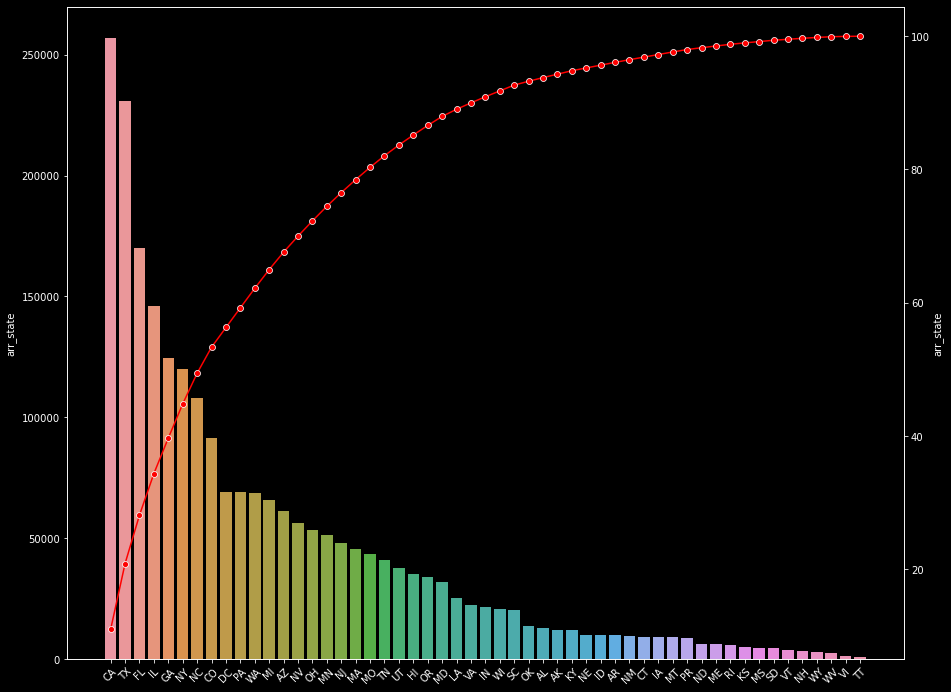

In [169]:
fig, ax1 = plt.subplots(figsize=(15,12))


sns.barplot(x=arr_states_traffic.index, y=arr_states_traffic, ax=ax1)
ax1.set_xticklabels(labels=arr_states_traffic.index, rotation=45)
ax2 = ax1.twinx()

sns.lineplot(data = ((arr_states_traffic.cumsum() / arr_states_traffic.sum()) * 100), color='red', marker='o', sort = False, ax=ax2)



In [172]:
flights['origin_airport_id']

0          12266
1          13244
2          12266
3          11042
4          13061
           ...  
2339957    11298
2339958    13577
2339959    10792
2339960    12266
2339961    10868
Name: origin_airport_id, Length: 2339962, dtype: int64

In [115]:
dep_states_traffic

dep_state
CA           257018
TX           230132
FL           170341
IL           146331
GA           125186
NY           119871
NC           107958
CO            91658
PA            69668
DC            69091
WA            67883
MI            66087
AZ            61273
NV            56277
OH            53043
MN            50891
NJ            48041
MA            44812
MO            42998
TN            41334
UT            37673
HI            35201
OR            33702
MD            31648
LA            25101
VA            22621
IN            21266
WI            21130
SC            20401
OK            13345
AL            12889
KY            12195
AK            12167
ID             9909
NE             9849
AR             9457
NM             9435
IA             9140
CT             9090
MT             8946
PR             8579
ND             6279
ME             6032
RI             5840
KS             4860
SD             4581
MS             4567
NH             3533
VT             3336
WY        

<BarContainer object of 53 artists>

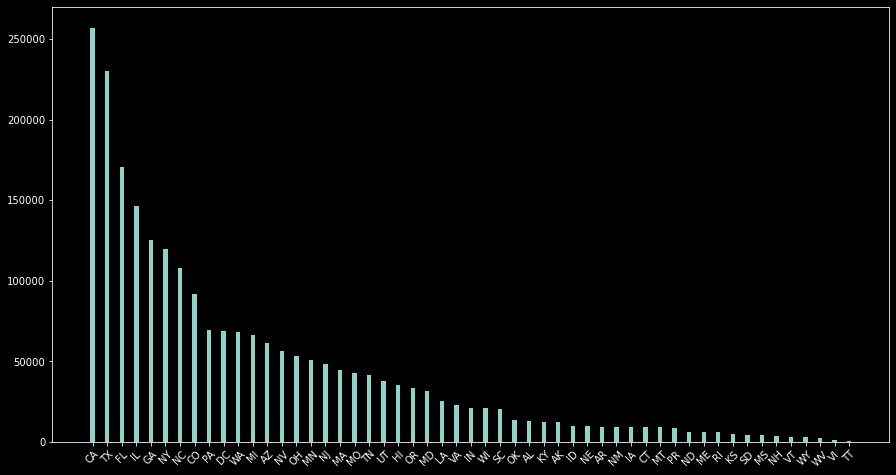

In [61]:
data1 = dep_states_traffic.index
width =0.3
fig = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(data1, width=width, height=dep_states_traffic)


In [93]:
dep_states_traffic.cumsum()

CA     257018
TX     487150
FL     657491
IL     803822
GA     929008
NY    1048879
NC    1156837
CO    1248495
PA    1318163
DC    1387254
WA    1455137
MI    1521224
AZ    1582497
NV    1638774
OH    1691817
MN    1742708
NJ    1790749
MA    1835561
MO    1878559
TN    1919893
UT    1957566
HI    1992767
OR    2026469
MD    2058117
LA    2083218
VA    2105839
IN    2127105
WI    2148235
SC    2168636
OK    2181981
AL    2194870
KY    2207065
AK    2219232
ID    2229141
NE    2238990
AR    2248447
NM    2257882
IA    2267022
CT    2276112
MT    2285058
PR    2293637
ND    2299916
ME    2305948
RI    2311788
KS    2316648
SD    2321229
MS    2325796
NH    2329329
VT    2332665
WY    2335698
WV    2338154
VI    2339388
TT    2339962
Name: dep_state, dtype: int64

<AxesSubplot:label='9d36852e-8ac9-4e7a-8a00-a22436744e4b'>

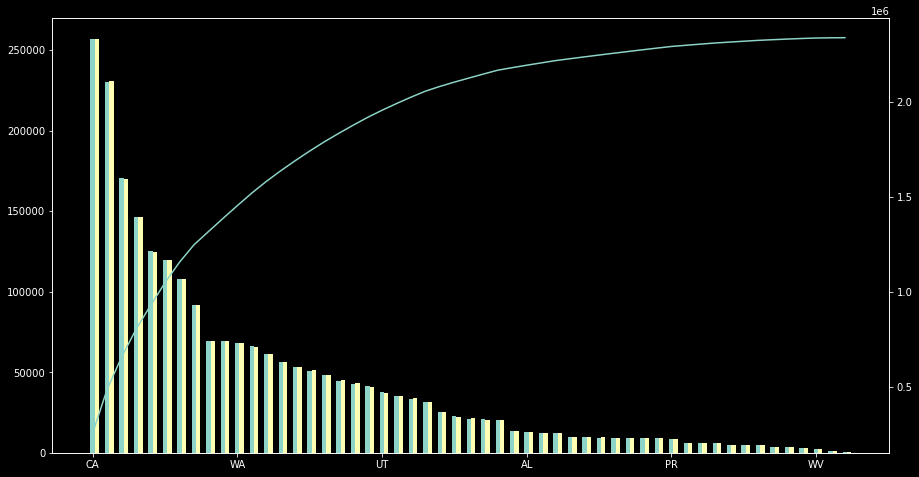

In [127]:
data1 = dep_states_traffic.index
data2 = arr_states_traffic.index


width =0.3
states = dep_states_traffic.index
fig = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
#plt.xlabel(dep_states_traffic.index)

plt.bar((len(data1)), width=width, height=dep_states_traffic)
plt.bar(np.arange(len(data2)) + width, width=width, height=arr_states_traffic)
#plt.plot(dep_states_traffic.cumsum())
dep_states_traffic.cumsum().plot(secondary_y=True)


<AxesSubplot:ylabel='dep_state'>

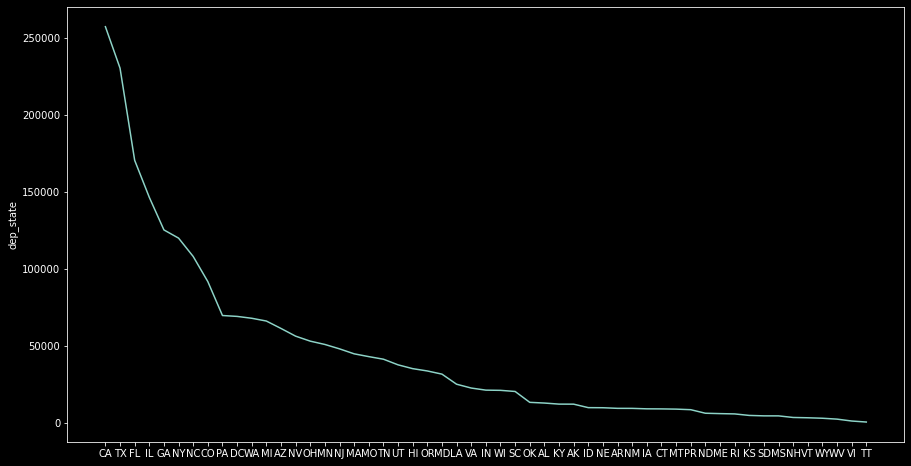

In [118]:
fig = plt.figure(figsize=(15,8))
sns.lineplot(data = dep_states_traffic)

In [119]:
dep_states_traffic.cumsum()

CA     257018
TX     487150
FL     657491
IL     803822
GA     929008
NY    1048879
NC    1156837
CO    1248495
PA    1318163
DC    1387254
WA    1455137
MI    1521224
AZ    1582497
NV    1638774
OH    1691817
MN    1742708
NJ    1790749
MA    1835561
MO    1878559
TN    1919893
UT    1957566
HI    1992767
OR    2026469
MD    2058117
LA    2083218
VA    2105839
IN    2127105
WI    2148235
SC    2168636
OK    2181981
AL    2194870
KY    2207065
AK    2219232
ID    2229141
NE    2238990
AR    2248447
NM    2257882
IA    2267022
CT    2276112
MT    2285058
PR    2293637
ND    2299916
ME    2305948
RI    2311788
KS    2316648
SD    2321229
MS    2325796
NH    2329329
VT    2332665
WY    2335698
WV    2338154
VI    2339388
TT    2339962
Name: dep_state, dtype: int64

<AxesSubplot:ylabel='dep_state'>

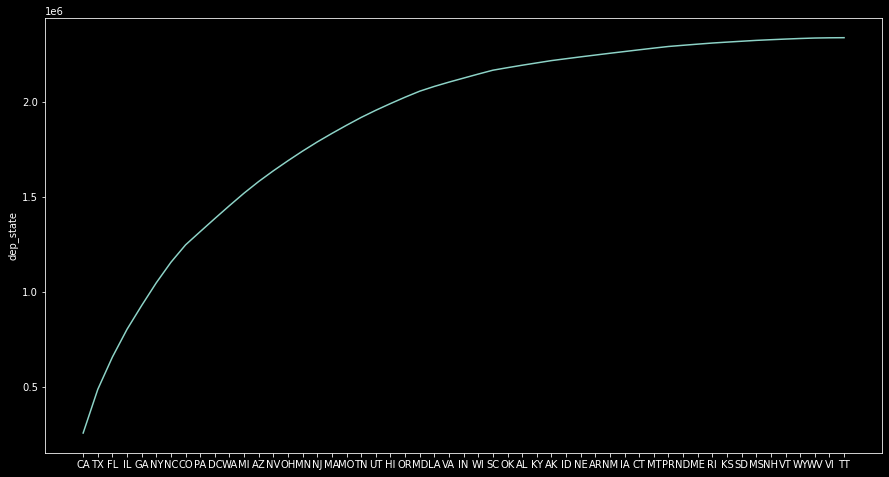

In [116]:
fig = plt.figure(figsize=(15,8))
sns.lineplot(data = dep_states_traffic.cumsum())

Dep_states 

<AxesSubplot:label='e570a785-d6f9-41a1-ae59-bf4ff4e1d707', ylabel='dep_state'>

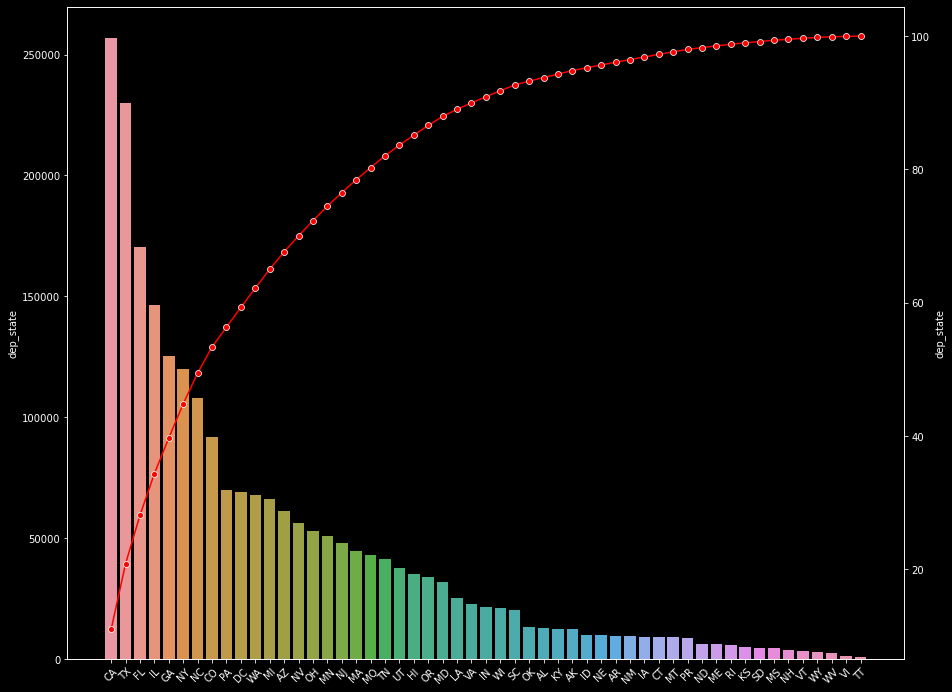

In [164]:
fig, ax1 = plt.subplots(figsize=(15,12))


sns.barplot(x=dep_states_traffic.index, y=dep_states_traffic, ax=ax1)
ax1.set_xticklabels(labels=dep_states_traffic.index, rotation=45)
ax2 = ax1.twinx()

sns.lineplot(data = ((dep_states_traffic.cumsum() / dep_states_traffic.sum()) * 100), color='red', marker='o', sort = False, ax=ax2)



In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.countplot(data=df, x="class", hue='sex')
plt.title('Number of passengers, by class')
plt.xlabel('Class')
plt.ylabel('# of Passengers')
sns.despine()
plt.show()

In [130]:
dep_states_traffic.index[0]

('CA',)

TypeError: 'value' must be an instance of str or bytes, not a tuple

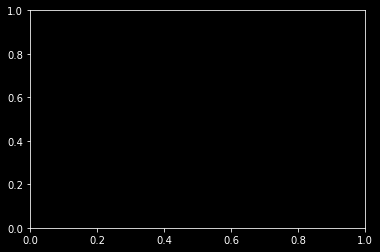

In [119]:
data1 = dep_states_traffic
data2 = arr_states_traffic
width =0.3
plt.bar(dep_states_traffic.index, data1, width=width)
plt.bar(data2 + width, data2, width=width)
plt.show()

In [ ]:
tick_pos = [val + width / 2 for val in m_xpos]
plt.xticks(tick_pos, states)

In [ ]:
plt.bar(np.arange(len(data1)), width=width, height=dep_states_traffic)
plt.bar(np.arange(len(data2)) + width, width=width, height=arr_states_traffic)

In [128]:
states = dep_states_traffic.index

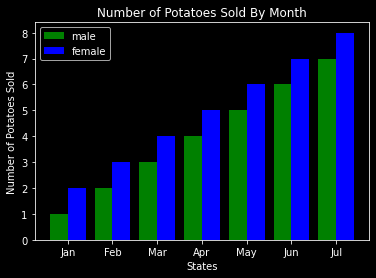

In [129]:
import matplotlib.pyplot as plt

def make_double_bar_graph():
    # the width of our bars
    bar_width = 0.4

    states = dep_states_traffic.index
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
    nbr_potatoes_male = [1, 2, 3, 4, 5, 6, 7]
    nbr_potatoes_female = [2, 3, 4, 5, 6, 7, 8]

    # [0, 1, 2, 3, 4, 5, 6]
    m_xpos = [i for i, _ in enumerate(months)]

    # [0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4]
    f_xpos = [val + bar_width for val in m_xpos]

    # labels the x axis with Months
    plt.xlabel('States')

    # labels the y axis with Number Potatoes
    plt.ylabel('Number of Potatoes Sold')

    # changes the title of our graph
    plt.title('Number of Potatoes Sold By Month')

    # we want to use months as our x-axis ticks, instead of numbers, 
    # and we want it centered between the two bars.
    tick_pos = [val + bar_width / 2 for val in m_xpos]
    plt.xticks(tick_pos, states)

    # make bars for male customer data
    plt.bar(m_xpos, nbr_potatoes_male, label='male', width=bar_width, color='g')

    # make bars for female customer data
    plt.bar(f_xpos, nbr_potatoes_female, label='female', width=bar_width, color='b')

    plt.legend()
    plt.show()
   
make_double_bar_graph()